In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("RabinovichFabrikant_benchmark.csv")
df.steps = df.steps.apply(eval)
df

,algorithm,heuristics,steps
0,BFS,none,"[90, 294, 391, 265, 287, 145, 260, 485, 57, 29..."
1,BFS,FVC,"[58, 48, 47, 58, 86, 68, 86, 57, 58, 47, 68, 4..."
2,BFS,AED,"[486, 357, 413, 487, 487, 487, 487, 179, 179, ..."
3,BFS,AEQD,"[48, 47, 48, 48, 47, 48, 48, 47, 48, 47, 48, 4..."
4,BFS,SMD,"[47, 311, 385, 311, 385, 255, 177, 121, 385, 3..."
5,ID-DLS,none,"[177, 26, 443, 164, 253, 394, 20, 381, 231, 29..."
6,ID-DLS,FVC,"[4, 5, 16, 36, 47, 16, 4, 15, 4, 16, 23, 15, 2..."
7,ID-DLS,AED,"[7, 10, 371, 373, 336, 255, 149, 339, 198, 145..."
8,ID-DLS,AEQD,"[4, 4, 5, 4, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 4, ..."
9,ID-DLS,SMD,"[4, 148, 86, 227, 227, 227, 4, 230, 86, 4, 227..."


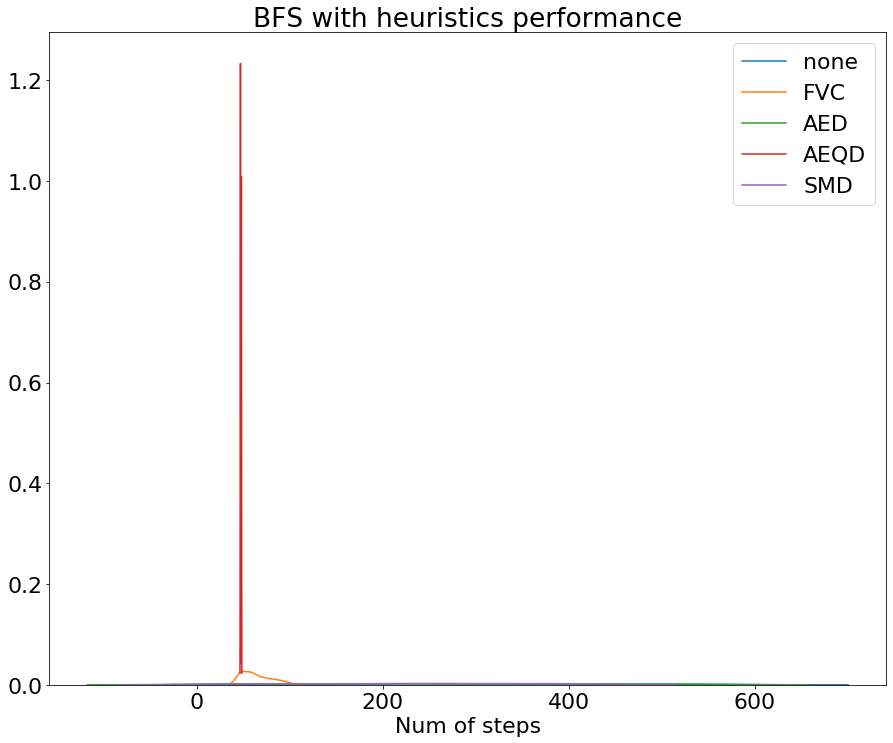

In [3]:
df_bfs = df[df.algorithm == "BFS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_bfs[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("BFS with heuristics performance");

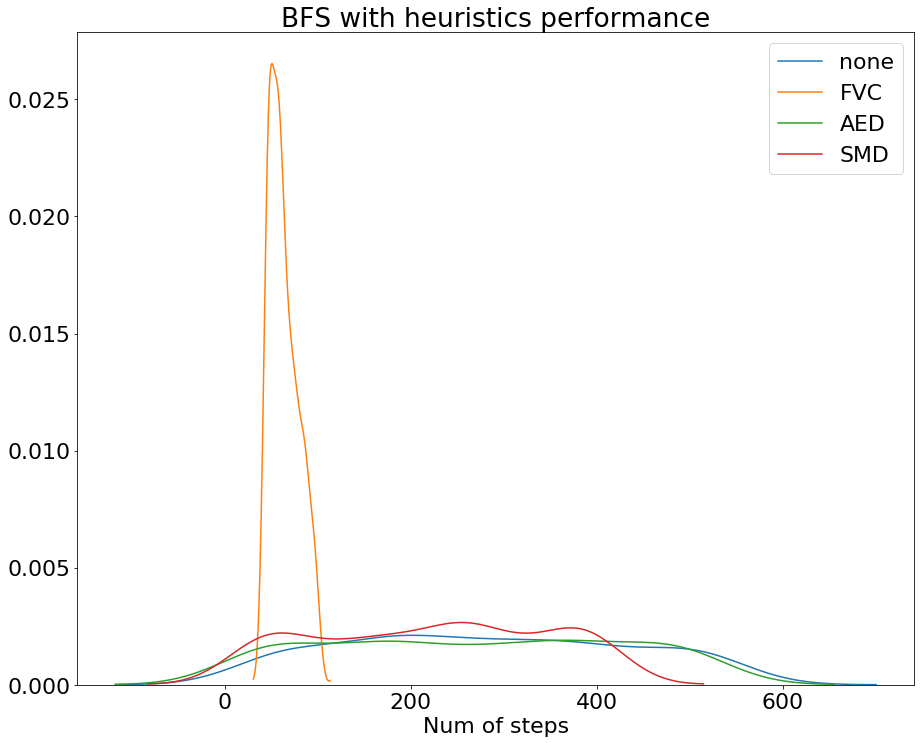

In [4]:
df_bfs_no_aeqd = df[(df.algorithm == "BFS") & (df.heuristics != "AEQD")][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_bfs_no_aeqd[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("BFS with heuristics performance");

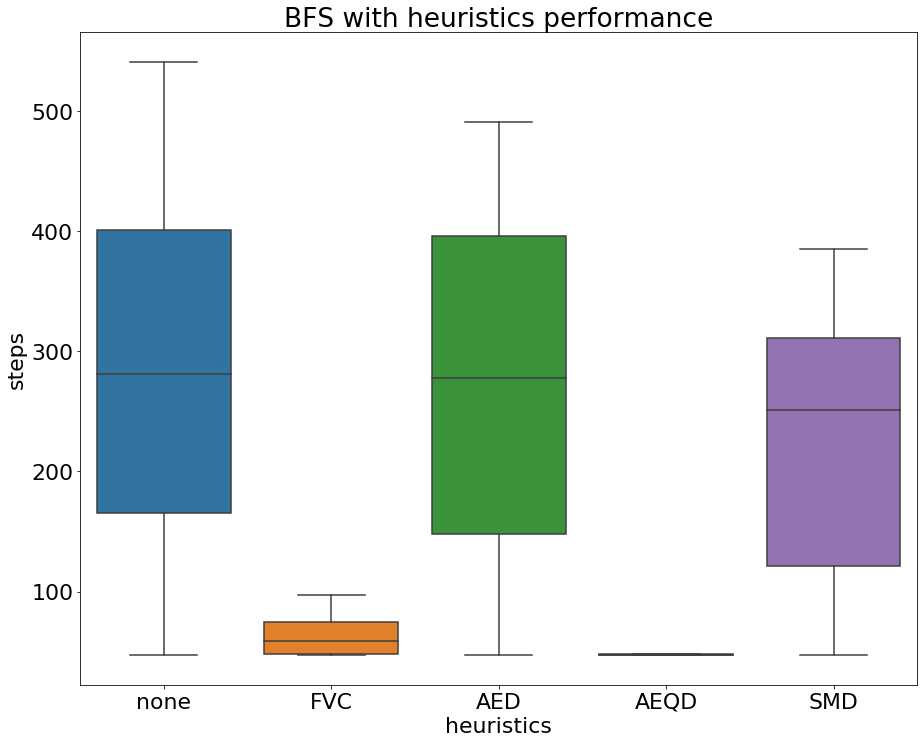

In [5]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_bfs.explode("steps"))
plt.title("BFS with heuristics performance");

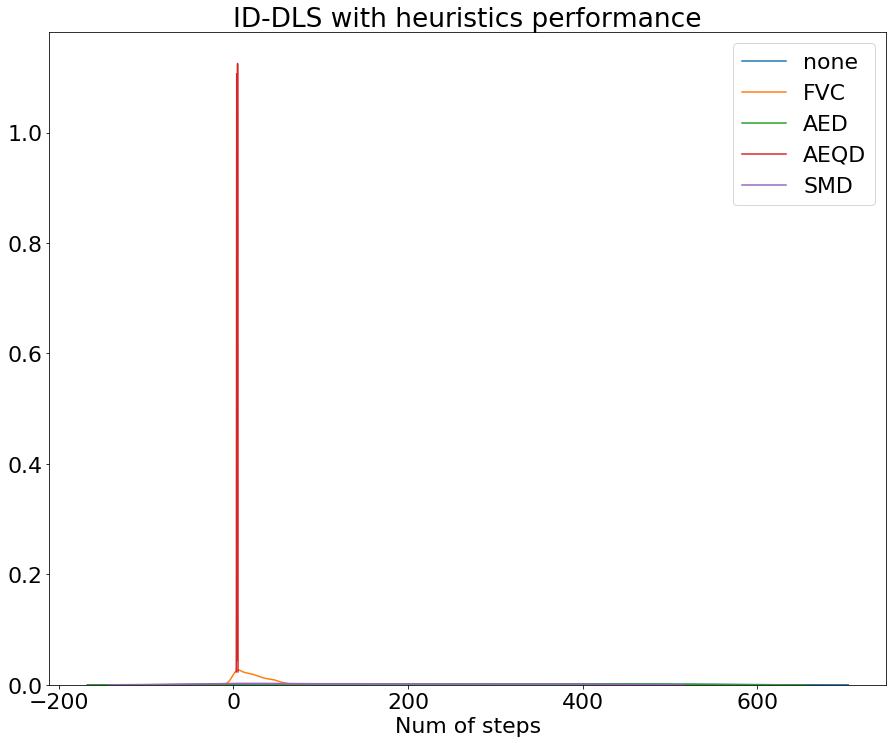

In [6]:
df_iddls = df[df.algorithm == "ID-DLS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_iddls[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("ID-DLS with heuristics performance");

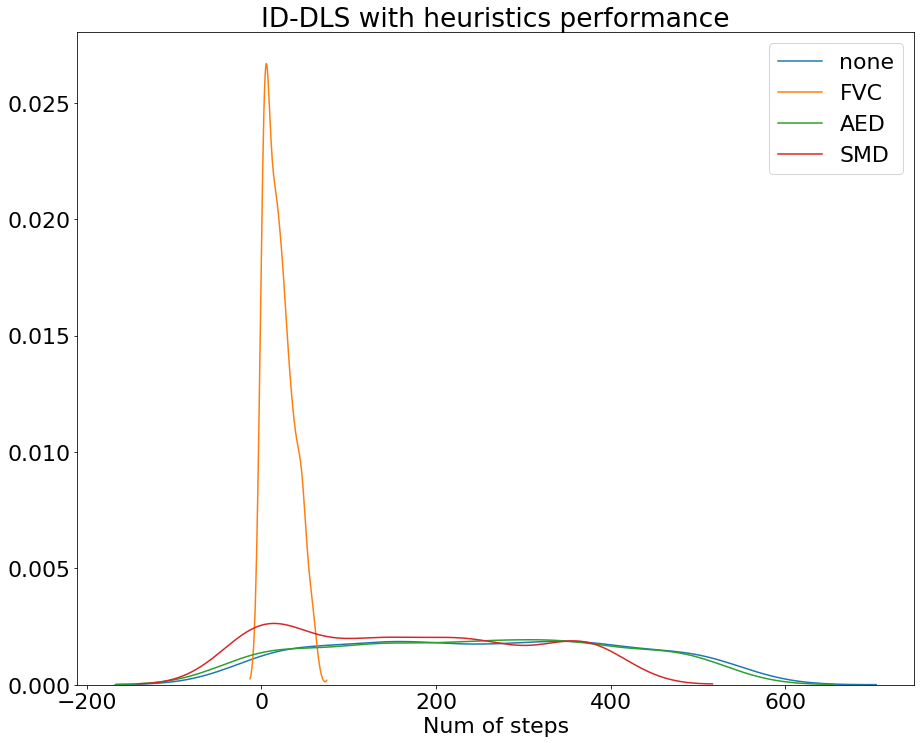

In [7]:
df_iddls_no_aeqd = df[(df.algorithm == "ID-DLS") & (df.heuristics != "AEQD")][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_iddls_no_aeqd[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("ID-DLS with heuristics performance");

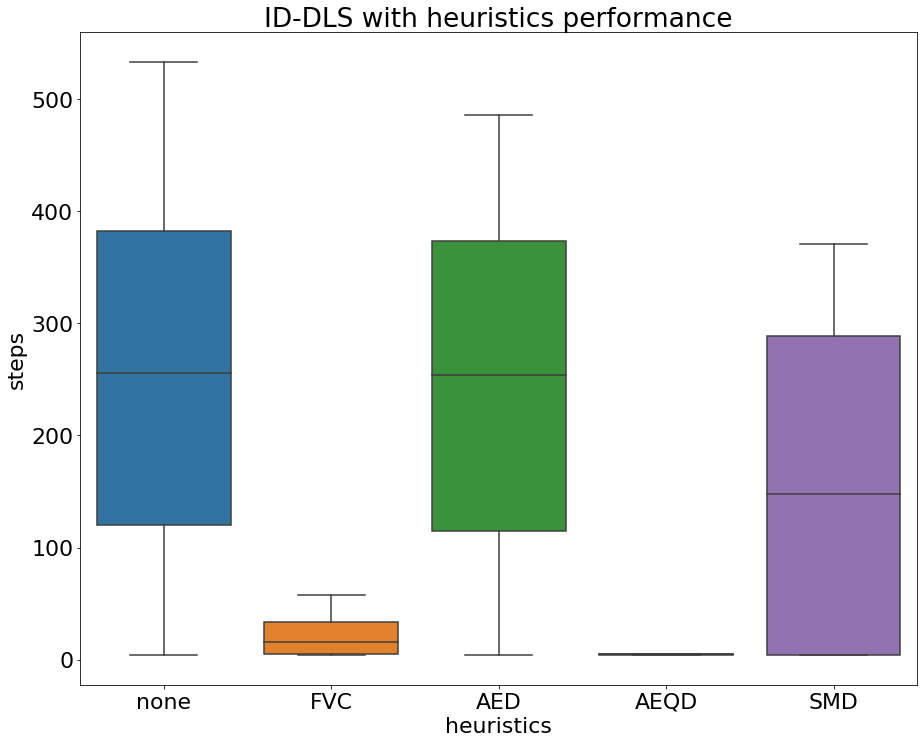

In [8]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_iddls.explode("steps"))
plt.title("ID-DLS with heuristics performance");

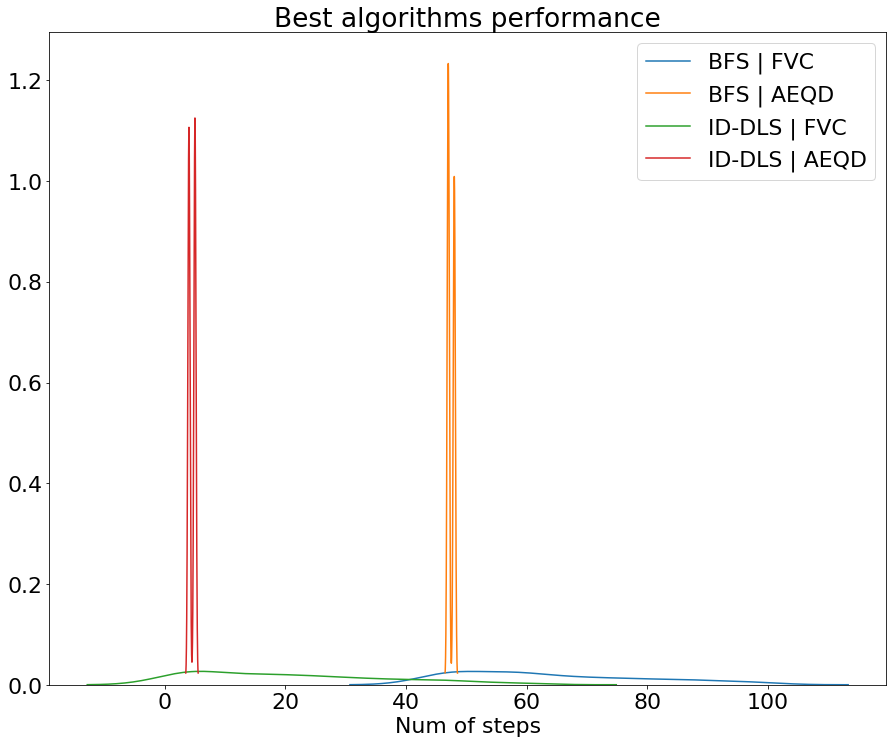

In [9]:
df_best = df[(df.heuristics.isin(["FVC", "AEQD"]))]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_best.iterrows():
    sns.distplot(row.steps, label=f"{row.algorithm} | {row.heuristics}", kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


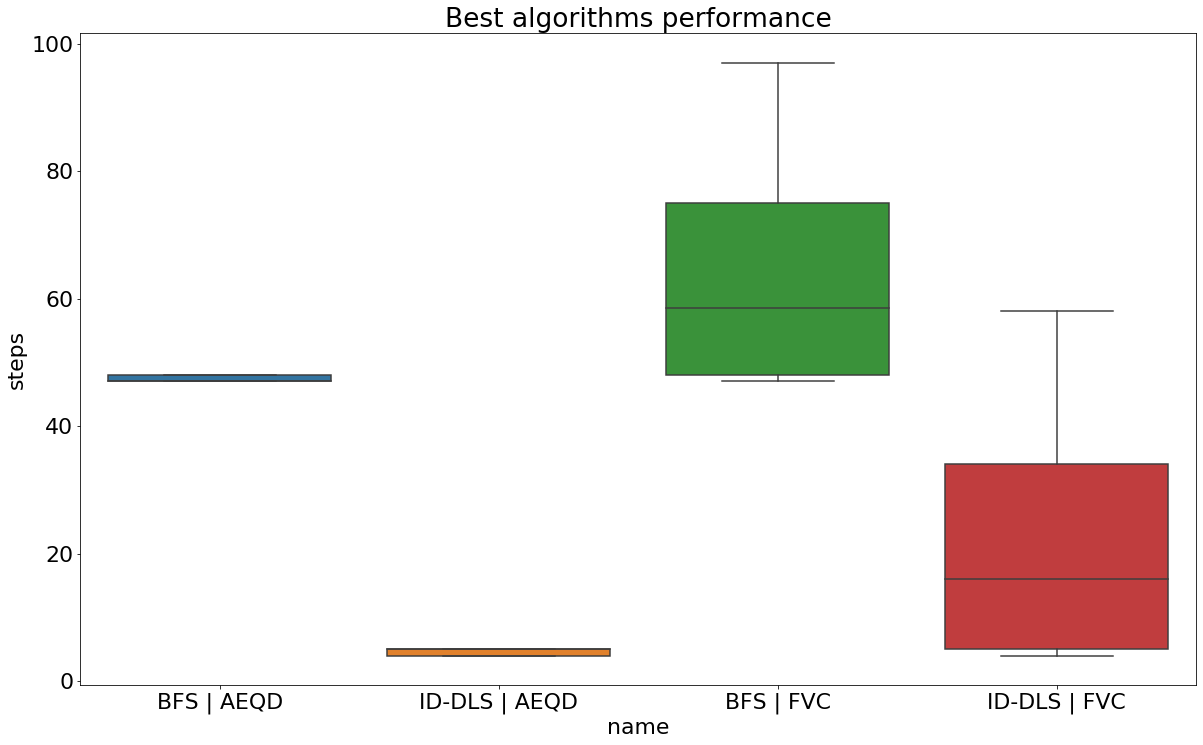

In [10]:
plt.figure(figsize=(20, 12))
df_best["name"] = df_best.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_best.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


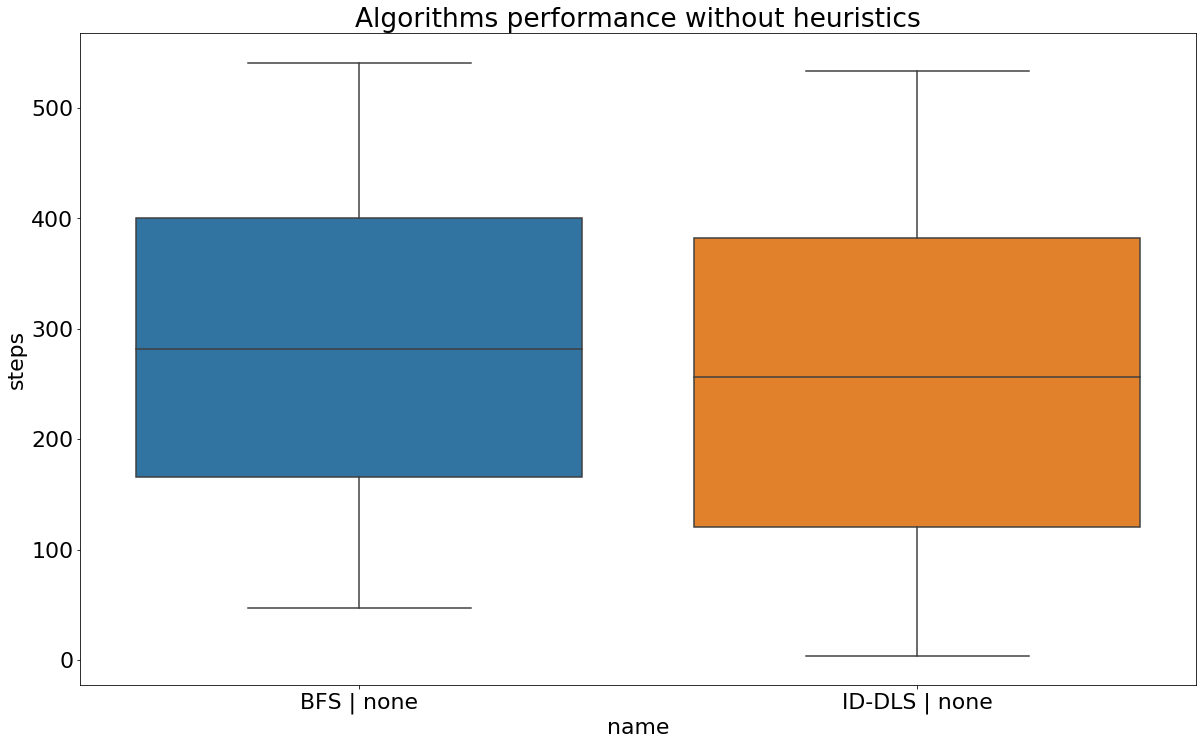

In [11]:
df_no_heur = df[(df.heuristics.isin(["none"]))]

plt.figure(figsize=(20, 12))
df_no_heur["name"] = df_no_heur.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_no_heur.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Algorithms performance without heuristics");

In [12]:
smd_iddls = df[(df.algorithm == "ID-DLS") & (df.heuristics == "AEQD")].steps.values[0]
bfs_none = df[(df.algorithm == "BFS") & (df.heuristics == "none")].steps.values[0]

print(f"AEQD ID-DLS: {np.mean(smd_iddls)} +- {np.std(smd_iddls)}")
print(f"BFS: {np.mean(bfs_none)} +- {np.std(bfs_none)}")

AEQD ID-DLS: 4.504166666666666 +- 0.49998263858747016
BFS: 282.77916666666664 +- 150.11719443811967


In [13]:
np.mean(bfs_none) / np.mean(smd_iddls)


62.78168362627197